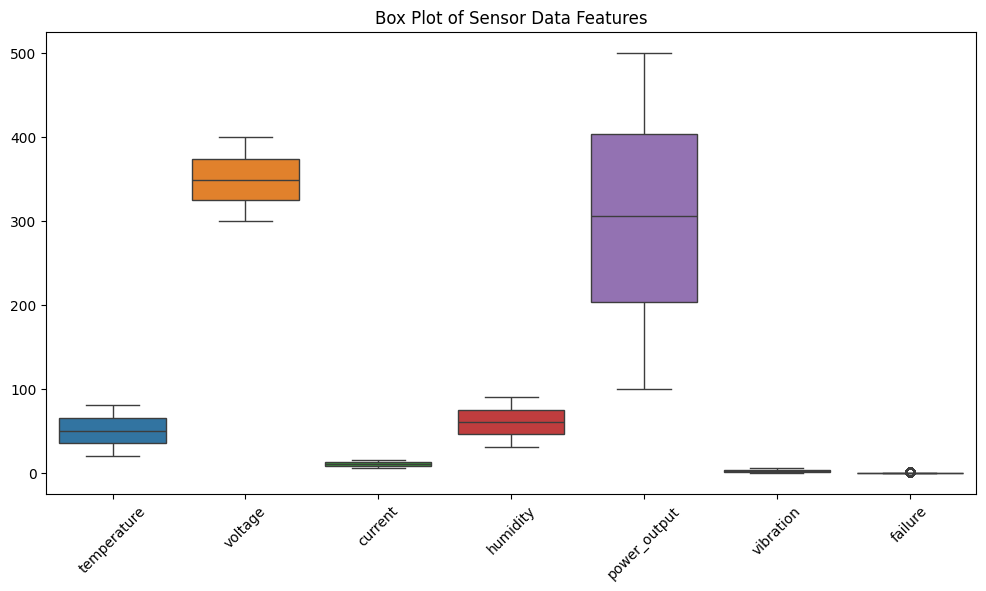

🔹 Random Forest Accuracy: 0.893
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       894
           1       0.00      0.00      0.00       106

    accuracy                           0.89      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.89      0.84      1000

🔹 XGBoost Accuracy: 0.893
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       894
           1       0.00      0.00      0.00       106

    accuracy                           0.89      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.89      0.84      1000

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8522 - loss: 0.4282 - val_accuracy: 0.8940 - val_loss: 0.3468
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8974 - loss: 0.3413 - val_accuracy: 0.8940 - val_loss: 0.3436
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8981 - loss: 0.3342 - val_accuracy: 0.8940 - val_loss: 0.3448
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8942 - loss: 0.3417 - val_accuracy: 0.8940 - val_loss: 0.3396
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9000 - loss: 0.3249 - val_accuracy: 0.8940 - val_loss: 0.3424
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9098 - loss: 0.3047 - val_accuracy: 0.8940 - val_loss: 0.3416
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9017 - loss: 0.3256 - val_accuracy: 0.8940 - val_loss: 0.3414
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8983 - loss: 0.3305 - val_accuracy: 0.8940 - val_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


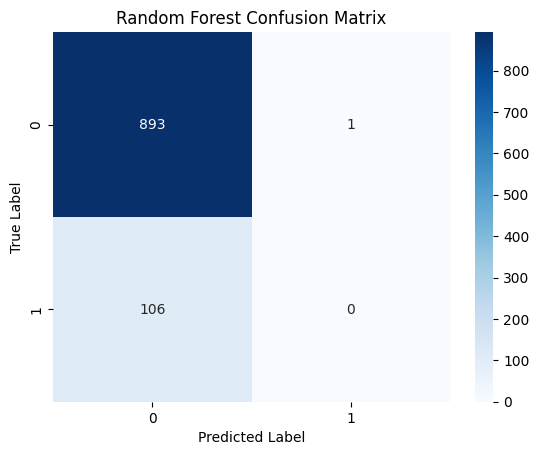

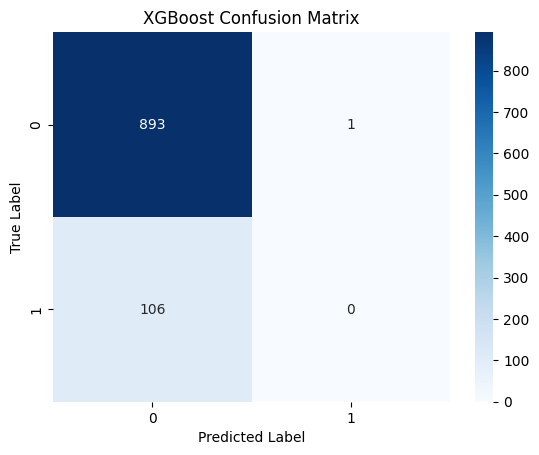

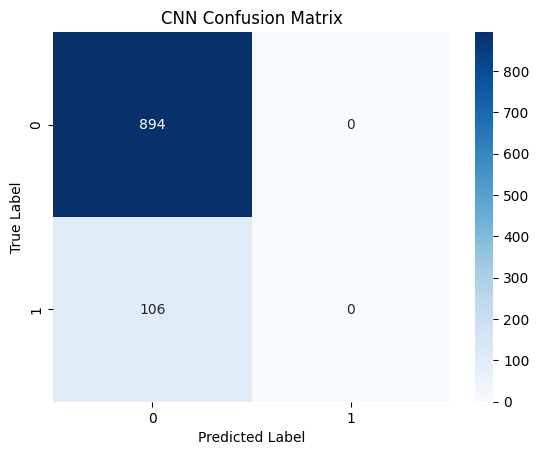


 Project Complete: AI-driven predictive maintenance can reduce downtime and optimize solar farm efficiency.


In [6]:
# Install required libraries (Uncomment if needed)
# !pip install numpy pandas scikit-learn xgboost tensorflow matplotlib seaborn

# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (Update with actual file path if needed)
data = pd.read_csv("/solar_sensor_data (1).csv")

# ========================== Data Visualization: Box Plots ==========================
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Sensor Data Features")
plt.xticks(rotation=45)
plt.show()

# Separate features and target variable
X = data.drop(columns=['failure'])
y = data['failure']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================== Random Forest Model ==========================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ========================== Gradient Boosting (XGBoost) ==========================
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# ========================== CNN for Time-Series Analysis ==========================
# Reshape input for CNN: (samples, time steps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define CNN Model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Predict with CNN
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

print("🔹 CNN Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))

# ========================== Model Performance Comparison ==========================
# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_cnn, "CNN Confusion Matrix")

# ========================== Conclusion ==========================
print("\n Project Complete: AI-driven predictive maintenance can reduce downtime and optimize solar farm efficiency.")
